In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import datetime

# Load data from CSV
data = pd.read_csv("filled_data.csv",parse_dates=['Date'])


2024-03-21 04:18:18.044276: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-21 04:18:18.047439: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-21 04:18:18.084744: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2024-03-21 04:18:19.148848: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# pip install pandas numpy tensorflow keras scikit-learn


In [3]:
data["Date"]=pd.to_datetime(data['Date'],dayfirst=True)

In [4]:
train=data[data['Date']<'2019-01-01']
test=data[data['Date']>='2019-01-01']

In [5]:
train.shape

(5479, 9)

In [6]:
test.shape

(365, 9)

In [7]:
features = [
    "Modal Price (Rs./Quintal)",
    "Rel Humidity at 2 Meters (%) ",
    "Precipitation Corrected (mm/day) ",
    "Surface Soil Wetness",
    "Root Zone Soil Wetness",
    "Temperature at 2 Meters",
]
target = "Modal Price (Rs./Quintal)"

In [8]:
# python -m pip install flask

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
target_scaler=MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(train[features])
y_train=target_scaler.fit_transform(np.array(train[target]).reshape(-1, 1))

In [10]:
X_test=scaler.transform(test[features])
y_test=target_scaler.transform(np.array(test[target]).reshape(-1,1))

In [11]:
X_test.shape

(365, 6)

In [12]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

def create_sequences(data, look_back):
    X, y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i : (i + look_back), :])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)


look_back = 60  # Adjust this based on your data and experiment

X_train_seq, y_train_seq = create_sequences(X_train, look_back)
X_test_seq, y_test_seq = create_sequences(X_test, look_back)

# Define and train the LSTM model
model = Sequential()
model.add(
    LSTM(50, return_sequences=True, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]))
)  # Adjust units (50) based on your data and experiment
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam")
model.fit(X_train_seq, y_train_seq, epochs=20, batch_size=32, validation_data=(X_test_seq, y_test_seq))

# Make predictions on test data
y_pred = model.predict(X_test_seq)



Epoch 1/20


/opt/hostedtoolcache/Python/3.12.2/x64/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6:23 2s/step - loss: 0.2224

  4/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1768

  6/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1570

  9/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1361

 11/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1259

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1173

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1067

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0981

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0910

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0849

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0797

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0752

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0712

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0677

 40/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0645

 43/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0617

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0591

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0568

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0547

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0527

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0509

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0493

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0477

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0463

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0449

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0437

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0425

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0414

 82/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0403

 85/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0393

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0384

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0375

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0367

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0359

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0351

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0344

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0337

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0331

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0324

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0318

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0312

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0307

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0301

127/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0296

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0291

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0287

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0282

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0278

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0273

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0269

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0265

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0261

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0258

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0254

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0251

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0247

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0244

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0241

170/170 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 0.0239 - val_loss: 0.0011


Epoch 2/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 7.4747e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 6.0568e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 5.8866e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 6.0934e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 6.2253e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 6.2779e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 6.2964e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 6.2801e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 6.2436e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 6.2147e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 6.2055e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 6.1816e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 6.1820e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 6.1907e-04

 42/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 6.1968e-04

 44/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 6.2064e-04

 47/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 6.2130e-04

 50/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 6.2168e-04

 53/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 6.2189e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 6.2186e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 6.2095e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 6.1983e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 6.1904e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 6.1791e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 6.1671e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 6.1529e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 6.1436e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 6.1360e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 6.1275e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 6.1194e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 6.1097e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 6.0994e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 6.0889e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 6.0802e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 6.0705e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 6.0596e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 6.0480e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 6.0348e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 6.0219e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 6.0095e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 5.9970e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 5.9854e-04

123/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 5.9787e-04

126/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 5.9687e-04

129/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 5.9601e-04

132/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 5.9521e-04

135/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 5.9435e-04

138/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 5.9342e-04

141/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 5.9244e-04

144/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 5.9146e-04

147/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 5.9052e-04

150/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 5.8961e-04

153/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 5.8879e-04

156/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 5.8797e-04

159/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 5.8712e-04

162/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 5.8628e-04

165/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 5.8559e-04

168/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 5.8493e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 5.8429e-04 - val_loss: 0.0015


Epoch 3/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 3.7989e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.2961e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.1913e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.2757e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.2987e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.3547e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.4121e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.5505e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.7534e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.9038e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.9941e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 5.0468e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 5.0886e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 5.1091e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 5.1153e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 5.1117e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 5.1015e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 5.0886e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 5.0778e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 5.0641e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 5.0510e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 5.0366e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 5.0239e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 5.0094e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.9950e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.9827e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.9706e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.9600e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.9474e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.9338e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.9219e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.9113e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.9017e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.8930e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.8858e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.8789e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.8726e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.8666e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.8603e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.8556e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.8523e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.8500e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.8474e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.8457e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.8445e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.8451e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.8455e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.8451e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.8446e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.8442e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.8436e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.8428e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.8424e-04

159/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.8423e-04

162/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.8419e-04

165/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.8412e-04

168/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.8404e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 4.8392e-04 - val_loss: 0.0010


Epoch 4/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 2.0926e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.3158e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.1030e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.4210e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.4757e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.4889e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.4644e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.4925e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.5111e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.5003e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.4777e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.4578e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.4389e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.4298e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.4350e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.4509e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.4738e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.4927e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.5103e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.5263e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.5359e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.5437e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.5493e-04

 69/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.5515e-04

 72/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.5532e-04

 75/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.5528e-04

 78/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.5515e-04

 81/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.5492e-04

 84/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.5464e-04

 87/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.5429e-04

 90/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.5377e-04

 93/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.5333e-04

 96/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.5307e-04

 99/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.5277e-04

102/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.5264e-04

105/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.5288e-04

108/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.5326e-04

111/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.5370e-04

114/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.5405e-04

117/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.5438e-04

120/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.5474e-04

123/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.5507e-04

126/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.5535e-04

129/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.5565e-04

132/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.5590e-04

135/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.5608e-04

138/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.5621e-04

141/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.5634e-04

144/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.5649e-04

147/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.5659e-04

150/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.5672e-04

153/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.5690e-04

156/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.5710e-04

159/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.5724e-04

162/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.5733e-04

165/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.5741e-04

168/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.5744e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 4.5752e-04 - val_loss: 6.8490e-04


Epoch 5/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 3.8300e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.8086e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.0208e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.3765e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.5013e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.5701e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.5694e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.5524e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.5584e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.5572e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.5477e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.5453e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.5366e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.5225e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.5147e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.5074e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.5012e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.4960e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.4870e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.4758e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.4686e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.4691e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.4694e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.4694e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.4676e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.4662e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.4623e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.4572e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.4534e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.4485e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.4421e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.4341e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.4251e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.4166e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.4085e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.4000e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.3915e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.3839e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.3770e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.3711e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.3647e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.3576e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.3502e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.3424e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.3344e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.3274e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.3202e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.3127e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.3055e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.2990e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.2925e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.2865e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.2806e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.2746e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.2691e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.2637e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.2582e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 4.2546e-04 - val_loss: 0.0012


Epoch 6/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 1.3368e-04

  3/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 1.7766e-04

  5/170 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 2.2210e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 3.1321e-04

  9/170 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 3.6931e-04

 12/170 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 4.1352e-04

 15/170 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 4.3457e-04

 18/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.4565e-04

 21/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.4887e-04

 24/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.4762e-04

 27/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.4559e-04

 30/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.4240e-04

 33/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.4091e-04

 36/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.3879e-04

 39/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 4.3617e-04

 42/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.3416e-04

 45/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.3216e-04

 48/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.3023e-04

 51/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.2875e-04

 53/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.2783e-04

 56/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.2639e-04

 59/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.2507e-04

 62/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.2407e-04

 65/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.2320e-04

 68/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.2238e-04

 71/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.2161e-04

 74/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.2115e-04

 77/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.2062e-04

 80/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.2002e-04

 83/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.1939e-04

 86/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.1866e-04

 89/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.1785e-04

 92/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.1703e-04

 95/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.1630e-04

 98/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.1586e-04

101/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.1575e-04

104/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.1580e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.1601e-04

108/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.1624e-04

110/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.1646e-04

113/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.1668e-04

116/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.1684e-04

119/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.1690e-04

122/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.1687e-04

125/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.1686e-04

128/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.1685e-04

131/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.1685e-04

134/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.1683e-04

137/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.1675e-04

140/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.1657e-04

143/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.1637e-04

146/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.1618e-04

149/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.1595e-04

152/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.1569e-04

155/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.1542e-04

158/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.1516e-04

161/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.1491e-04

164/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.1463e-04

167/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.1438e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.1423e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 4.1419e-04 - val_loss: 0.0011


Epoch 7/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 3.9197e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.4557e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.2585e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.1106e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.9604e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.8594e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.8019e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.7515e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.7037e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.6684e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.6593e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.6489e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.6341e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.6176e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.5990e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.5813e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.5637e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.5463e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.5297e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.5259e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.5277e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.5368e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.5456e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.5516e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.5563e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.5594e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.5616e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.5645e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.5689e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.5737e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.5775e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.5820e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.5866e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.5905e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.5936e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.5958e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.5973e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.5978e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.5983e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.5985e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.5978e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.5969e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.5958e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.5951e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.5942e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.5928e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.5912e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.5899e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.5885e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.5875e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.5866e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.5857e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.5844e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.5831e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.5822e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.5816e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.5811e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 3.5809e-04 - val_loss: 0.0022


Epoch 8/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 9.3757e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 7.7843e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 7.0438e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 6.8276e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 6.6760e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 6.4955e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 6.3447e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 6.2509e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 6.1489e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 6.0518e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 5.9687e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 5.8897e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 5.8036e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 5.7166e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 5.6349e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 5.5547e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 5.4770e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 5.4016e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 5.3291e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 5.2622e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 5.1987e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 5.1421e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 5.0895e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 5.0399e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.9941e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.9517e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.9128e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.8756e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.8401e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.8064e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.7737e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.7409e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.7086e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.6778e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.6485e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.6204e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.5939e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.5700e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.5472e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.5253e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.5049e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.4850e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.4651e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.4456e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.4265e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.4084e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.3917e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.3769e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.3623e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.3482e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.3348e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.3216e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.3084e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.2954e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.2828e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.2707e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.2588e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 4.2509e-04 - val_loss: 5.4418e-04


Epoch 9/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 2.7895e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.8759e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.9385e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.8602e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.7713e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.6843e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.6844e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.6783e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.6689e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.6537e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.6785e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.7073e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.7249e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.7363e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.7503e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.7631e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.7668e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.7649e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.7620e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.7583e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.7521e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.7449e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.7365e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.7266e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.7174e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.7075e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.6976e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.6879e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.6780e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.6676e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.6563e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.6451e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.6349e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.6250e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.6148e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.6061e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.5981e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.5898e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.5822e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.5749e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.5677e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.5608e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.5540e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.5472e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.5406e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.5344e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.5288e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.5234e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.5184e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.5135e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.5086e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.5038e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.4991e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.4941e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.4893e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.4845e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.4799e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 3.4769e-04 - val_loss: 7.0334e-04


Epoch 10/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 6.4151e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.6868e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.6489e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.7822e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.9309e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 5.0113e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 5.0906e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 5.1262e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 5.1238e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 5.0893e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 5.0425e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.9928e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.9342e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.8717e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.8098e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.7510e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.6944e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.6396e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.5878e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.5403e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.4951e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.4519e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.4122e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.3752e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.3420e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.3117e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.2833e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.2564e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.2306e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.2057e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.1806e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.1571e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.1345e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.1120e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.0901e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.0686e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.0485e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.0294e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.0114e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.9943e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.9778e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.9622e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.9477e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.9341e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.9207e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.9090e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.8987e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.8889e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.8811e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.8746e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.8681e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.8612e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.8541e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.8467e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.8391e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.8314e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.8237e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 3.8188e-04 - val_loss: 7.5527e-04


Epoch 11/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 2.3987e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.5252e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.6316e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.7341e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.9491e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.1054e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.1842e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.2144e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.2370e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.2623e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.2733e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.2783e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.2826e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.2812e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.2800e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.2724e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.2634e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.2577e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.2509e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.2434e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.2345e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.2262e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.2219e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.2180e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.2141e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.2105e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.2054e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.1994e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.1928e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.1857e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.1788e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.1716e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.1653e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.1594e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.1533e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.1469e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.1406e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.1343e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.1289e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.1235e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.1180e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.1124e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.1066e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.1010e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.0956e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.0910e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.0872e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.0834e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.0794e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.0758e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.0728e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.0701e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.0686e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.0670e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.0654e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.0640e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.0629e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 3.0621e-04 - val_loss: 6.1418e-04


Epoch 12/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 1.8528e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 1.5373e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 1.6103e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 1.7207e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 1.7635e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 1.8887e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 1.9774e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.0540e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.1162e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.1872e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.2577e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.3139e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.3622e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.4069e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.4605e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.5047e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.5424e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.5816e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.6192e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.6522e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.6801e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.7058e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.7287e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.7495e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.7699e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.7895e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.8092e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.8276e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.8455e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.8621e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.8770e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.8924e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.9072e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.9209e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.9333e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.9442e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.9549e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.9656e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.9766e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.9868e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.9959e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.0044e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.0121e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.0191e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.0255e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.0310e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.0358e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.0400e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.0439e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.0478e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.0518e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.0558e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.0595e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.0628e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.0660e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.0687e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.0709e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 3.0721e-04 - val_loss: 4.0799e-04


Epoch 13/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 1.7530e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.9465e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.0887e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.0753e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.0849e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.1135e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.1464e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.1859e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.2150e-04

 27/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.2426e-04

 29/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.2676e-04

 32/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.2934e-04

 35/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.3072e-04

 38/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.3100e-04

 41/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.3048e-04

 44/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.2956e-04

 47/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.2846e-04

 50/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.2750e-04

 53/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.2657e-04

 56/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.2582e-04

 59/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.2606e-04

 62/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.2621e-04

 65/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.2627e-04

 68/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.2623e-04

 71/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.2614e-04

 74/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.2583e-04

 77/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.2554e-04

 80/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.2527e-04

 83/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.2504e-04

 86/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.2474e-04

 89/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.2446e-04

 92/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.2418e-04

 95/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.2430e-04

 98/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.2445e-04

101/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.2454e-04

104/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.2457e-04

107/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.2452e-04

110/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.2441e-04

113/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.2426e-04

116/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.2420e-04

119/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.2413e-04

122/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.2404e-04

125/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.2391e-04

128/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.2375e-04

131/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.2354e-04

134/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.2329e-04

137/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.2303e-04

140/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.2273e-04

143/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.2237e-04

146/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.2198e-04

149/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.2157e-04

152/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.2111e-04

155/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.2062e-04

158/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.2011e-04

161/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.1964e-04

164/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.1918e-04

167/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.1870e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.1824e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 3.1810e-04 - val_loss: 4.1144e-04


Epoch 14/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 4.1630e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.9829e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.6321e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.4338e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.2708e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.1762e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.1132e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.0816e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.0465e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.0086e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.9769e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.9476e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.9210e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.8945e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.8688e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.8432e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.8195e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.8040e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.7902e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.7761e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.7633e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.7504e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.7390e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.7287e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.7187e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.7099e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.7017e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.6934e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6850e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6793e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6739e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6694e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6650e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6608e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6569e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6535e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6495e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6457e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6420e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6383e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6353e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6323e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6292e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6264e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6243e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6222e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6204e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6186e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6171e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6162e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6152e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6154e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6159e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6168e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6181e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6190e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6200e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 2.6206e-04 - val_loss: 5.0068e-04


Epoch 15/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 3.2752e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.2015e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.7794e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.0324e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.1683e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.1980e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.2009e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.1611e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.1073e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.0487e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.9925e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.9344e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.8932e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.8600e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.8276e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.7915e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.7555e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.7207e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.6882e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.6592e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.6355e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.6128e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.5898e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.5675e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.5451e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.5229e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.5009e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.4793e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.4589e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.4402e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.4214e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.4034e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.3866e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.3702e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.3547e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.3396e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.3246e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.3104e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.2962e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.2832e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.2711e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.2607e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.2509e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.2413e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.2324e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.2239e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.2162e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.2085e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.2011e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.1940e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.1873e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.1811e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.1754e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.1697e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.1640e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.1587e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.1534e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 3.1498e-04 - val_loss: 6.1208e-04


Epoch 16/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 3.8148e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.9359e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.5685e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.5706e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.6126e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.6366e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.6427e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.6377e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.6325e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.6268e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.6191e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.6130e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.6038e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.5908e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.5755e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.5627e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.5484e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.5362e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.5253e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.5162e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.5068e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.4968e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.4866e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.4766e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.4679e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.4625e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.4599e-04

 81/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.4588e-04

 84/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.4589e-04

 86/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.4598e-04

 89/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.4622e-04

 92/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.4667e-04

 95/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.4713e-04

 98/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.4751e-04

101/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.4786e-04

104/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.4822e-04

107/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.4853e-04

110/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.4873e-04

113/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.4888e-04

116/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.4898e-04

119/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.4910e-04

122/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.4916e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.4922e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.4930e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4934e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4940e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4944e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4953e-04

141/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4960e-04

143/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4965e-04

146/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4972e-04

149/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4979e-04

152/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4984e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4990e-04

156/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4999e-04

158/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.5008e-04

161/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.5022e-04

164/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.5033e-04

167/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.5042e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.5046e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 2.5050e-04 - val_loss: 3.8423e-04


Epoch 17/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 2.6171e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.4438e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.5001e-04

  9/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.4943e-04

 12/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.4550e-04

 15/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.4197e-04

 18/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.4128e-04

 21/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.4173e-04

 24/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.4206e-04

 27/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.4213e-04

 30/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.4347e-04

 33/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.4415e-04

 36/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.4436e-04

 39/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.4451e-04

 42/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.4460e-04

 45/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.4500e-04

 48/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.4541e-04

 51/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.4557e-04

 53/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.4592e-04

 56/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.4685e-04

 59/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.4765e-04

 62/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.4824e-04

 65/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.4858e-04

 68/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.4875e-04

 71/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.4902e-04

 74/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.4917e-04

 77/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.4932e-04

 80/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.4954e-04

 83/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.4974e-04

 86/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.4984e-04

 89/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.4979e-04

 92/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.4970e-04

 95/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.4956e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.4951e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.4946e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.4940e-04

105/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.4933e-04

108/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.4916e-04

111/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.4892e-04

114/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.4875e-04

117/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.4852e-04

120/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.4828e-04

123/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.4803e-04

126/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.4773e-04

129/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4741e-04

132/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4719e-04

135/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4700e-04

138/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4683e-04

141/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4667e-04

144/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4649e-04

147/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4632e-04

150/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4613e-04

153/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4593e-04

156/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4574e-04

159/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4554e-04

162/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4534e-04

165/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4513e-04

168/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4490e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 2.4466e-04 - val_loss: 4.9046e-04


Epoch 18/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 9.4170e-05

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 1.8397e-04

  6/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 1.9186e-04

  9/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.0164e-04

 12/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.2131e-04

 14/170 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.3066e-04

 17/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.3971e-04

 20/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.4698e-04

 23/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.5343e-04

 26/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.5812e-04

 29/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.6211e-04

 32/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.6537e-04

 35/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.6776e-04

 38/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.6985e-04

 41/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.7154e-04

 44/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.7252e-04

 47/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.7335e-04

 50/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.7380e-04

 53/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.7400e-04

 56/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.7413e-04

 59/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.7410e-04

 62/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.7388e-04

 65/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.7351e-04

 68/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.7290e-04

 71/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.7211e-04

 74/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.7118e-04

 77/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.7020e-04

 80/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.6920e-04

 83/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.6837e-04

 86/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.6782e-04

 89/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.6740e-04

 92/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.6701e-04

 95/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.6654e-04

 98/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.6602e-04

101/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.6552e-04

104/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.6526e-04

107/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.6492e-04

110/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.6453e-04

113/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.6412e-04

116/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.6373e-04

119/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.6340e-04

122/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.6311e-04

125/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.6289e-04

128/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.6273e-04

131/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.6264e-04

134/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.6257e-04

137/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.6250e-04

140/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.6242e-04

143/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.6230e-04

146/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.6219e-04

149/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.6206e-04

152/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.6191e-04

155/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.6175e-04

158/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.6164e-04

161/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.6155e-04

164/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.6146e-04

167/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.6137e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.6124e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 2.6120e-04 - val_loss: 3.8729e-04


Epoch 19/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 1.7293e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.5281e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.5517e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.3509e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.1714e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.0200e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.9724e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.9241e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.8859e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.8437e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.7989e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.7579e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.7245e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.6898e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.6563e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.6362e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.6169e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.6005e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.5909e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.5807e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.5711e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.5632e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.5540e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.5448e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.5359e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.5275e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.5204e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.5141e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.5086e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.5029e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.4973e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.4928e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.4888e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.4854e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.4820e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.4782e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.4745e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.4710e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.4673e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.4635e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.4603e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.4579e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.4556e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4532e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4510e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4486e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4463e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4443e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4426e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4407e-04

150/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4394e-04

153/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4375e-04

156/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4358e-04

159/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4338e-04

162/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4315e-04

165/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4292e-04

168/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4269e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 2.4245e-04 - val_loss: 4.3490e-04


Epoch 20/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 1.3998e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.4964e-04

  6/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.8258e-04

  9/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.0414e-04

 12/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.0594e-04

 15/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.0360e-04

 18/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.0088e-04

 21/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.9873e-04

 24/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.9591e-04

 27/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.9293e-04

 30/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.9118e-04

 33/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.9059e-04

 36/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.9065e-04

 39/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.9114e-04

 42/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.9150e-04

 45/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.9150e-04

 48/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.9104e-04

 51/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.9079e-04

 54/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.9056e-04

 57/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.8998e-04

 60/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.8920e-04

 63/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.8888e-04

 66/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.8832e-04

 69/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.8763e-04

 72/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.8681e-04

 75/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.8588e-04

 78/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.8487e-04

 81/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.8381e-04

 84/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.8269e-04

 87/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.8157e-04

 90/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.8047e-04

 93/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.7950e-04

 96/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.7855e-04

 99/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.7759e-04

102/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.7669e-04

105/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.7589e-04

108/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.7507e-04

111/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.7432e-04

114/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.7369e-04

117/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.7312e-04

120/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.7252e-04

123/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.7193e-04

126/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.7136e-04

129/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.7088e-04

132/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.7040e-04

135/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.6995e-04

138/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.6950e-04

141/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.6903e-04

144/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.6857e-04

147/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.6810e-04

150/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.6765e-04

153/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.6723e-04

156/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.6682e-04

159/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.6643e-04

162/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.6608e-04

165/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.6576e-04

168/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.6548e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 2.6520e-04 - val_loss: 3.6962e-04


 1/10 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step

 8/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step  

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [13]:
len(X_test)

365

In [14]:
y_pred = y_pred.reshape(-1)

In [15]:
y_pred_scaled = target_scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_seq = y_test_seq.reshape(-1)
y_test_scaled = target_scaler.inverse_transform(y_test_seq.reshape(-1, 1))


In [16]:
len(y_pred_scaled)

304

In [17]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test_scaled, y_pred_scaled, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 82.58


/opt/hostedtoolcache/Python/3.12.2/x64/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [18]:
y_pred_scaled[0]

array([3520.74], dtype=float32)

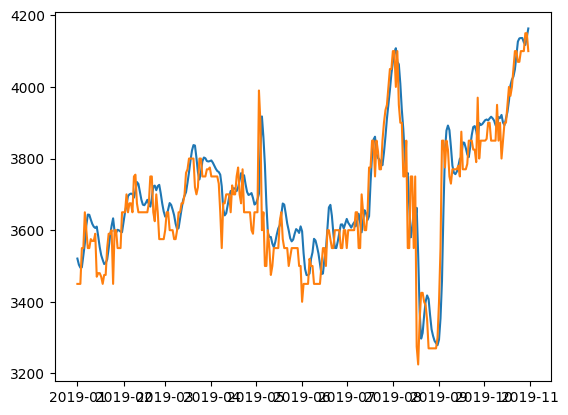

In [19]:
import matplotlib.pyplot as plt
plt.plot(test['Date'][0:304],y_pred_scaled.reshape(-1))
plt.plot(test['Date'][0:304],y_test_scaled.reshape(-1))

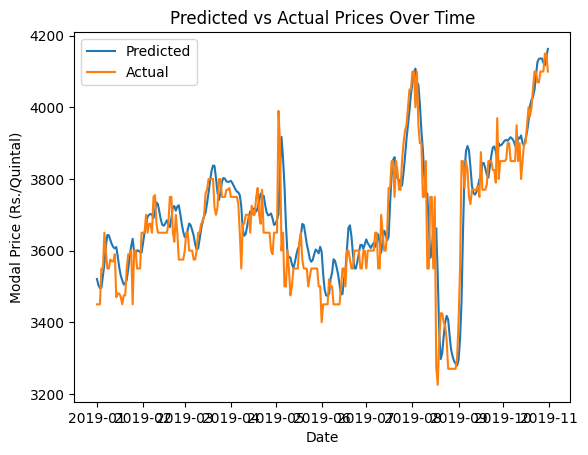

In [20]:

# Define the date range for plotting
date_range = test['Date'].iloc[:len(y_pred_scaled)]

# Plot the predictions against the actual values over time
plt.plot(date_range, y_pred_scaled, label='Predicted')
plt.plot(date_range, y_test_scaled, label='Actual')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Modal Price (Rs./Quintal)')
plt.title('Predicted vs Actual Prices Over Time')
plt.legend()

# Show plot
plt.show()

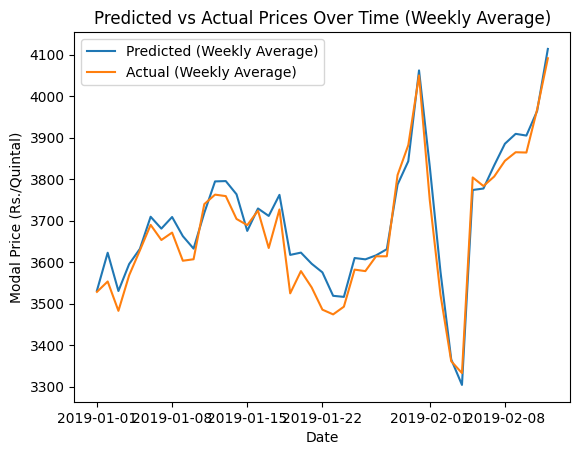

In [21]:
# Define the number of days in a week
days_in_week = 7
num_weeks = len(y_pred_scaled) // days_in_week

# Reshape the predictions and true values to weekly data
y_pred_weekly = y_pred_scaled[:num_weeks * days_in_week].reshape(-1, days_in_week).mean(axis=1)
y_test_weekly = y_test_scaled[:num_weeks * days_in_week].reshape(-1, days_in_week).mean(axis=1)


# Plot the weekly average predictions against the actual values
plt.plot(test['Date'][:len(y_pred_weekly)], y_pred_weekly, label='Predicted (Weekly Average)')
plt.plot(test['Date'][:len(y_test_weekly)], y_test_weekly, label='Actual (Weekly Average)')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Modal Price (Rs./Quintal)')
plt.title('Predicted vs Actual Prices Over Time (Weekly Average)')
plt.legend()
plt.savefig("static/my_plot1.png")
# Show plot
plt.show()

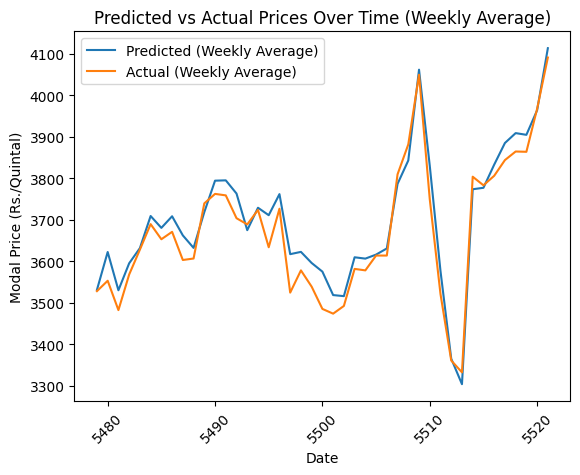

In [22]:

# Define the number of days in a week
days_in_week = 7
num_weeks = len(y_pred_scaled) // days_in_week

# Reshape the predictions and true values to weekly data
y_pred_weekly = y_pred_scaled[:num_weeks * days_in_week].reshape(-1, days_in_week).mean(axis=1)
y_test_weekly = y_test_scaled[:num_weeks * days_in_week].reshape(-1, days_in_week).mean(axis=1)

# Plot the weekly average predictions against the actual values
plt.plot(test.index[:len(y_pred_weekly)], y_pred_weekly, label='Predicted (Weekly Average)')
plt.plot(test.index[:len(y_test_weekly)], y_test_weekly, label='Actual (Weekly Average)')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Modal Price (Rs./Quintal)')
plt.title('Predicted vs Actual Prices Over Time (Weekly Average)')
plt.legend()

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)
plt.savefig('static/my_plot.png')
# Show plot
plt.show()